# Why Thanksgiving in Canada Won't Be

### A Deep Analysis in the Numbers of the COVID-19 Pandemic in Canada

In this notebook an analysis in regards to the COVID-19 Pandemic in Canada is discussed. Based on the [recent speech](https://www.youtube.com/watch?v=1B26cRv_MPw) (September 23rd, 2020) that Prime Minister, Justin Trudeau, where he acknowledged the fact that the country is already in a second wave of the novel COVID-19, and that the country will not be able to celebrate Thanksgiving (October 12th) as it has been celebrated in previous years.

![PM Justin Trudeau](https://res.cloudinary.com/dmlwdg4vj/image/fetch/w_800,h_450,c_fill,g_faces/https%3A%2F%2Fs3.amazonaws.com%2Fsocast-superdesk%2Fmedia%2F20200923220940%2Fe88ffd13b0928c78eba8f559851853fe83312785d65472c67912df811673c565.png)
> *PM Justin Trudeau during his speach about the novel Coronavirus second wave*

#### How to run the code?

This [Jupyter notebook](https://jupyter.org) is hosted in on [Jovian.ml](https://www.jovian.ml) and can be run in the following ways:

##### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle", but you'll need to create an account on [Google Colab](https://colab.research.google.com) or [Kaggle](https://kaggle.com) to use these platforms.

##### Option 2: Running on your computer locally

You'll need to install Python and download this notebook on your computer to run in locally. It is recommended to use the [Conda](https://docs.conda.io/en/latest/) distribution of Python. Here's what you need to do to get started:

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Make sure to add Conda binaries to your system `PATH` to be able to run the `conda` command line tool from your Mac/Linux terminal or Windows command prompt. 


2. Create and activate a [Conda virtual environment](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) called `canada-covid19-analysis` which you can use for this tutorial series:
```
conda create -n canada-covid19-analysis -y python=3.8 
conda activate canada-covid19-analysis
```
You'll need to create the environment only once, but you'll have to activate it every time want to run the notebook. When the environment is activated, you should be able to see a prefix `(canada-covid19-analysis)` within your terminal or command prompt.


3. Install the required Python libraries within the environmebt by the running the following command on your  terminal or command prompt:
```
pip install jovian jupyter numpy pandas matplotlib seaborn --upgrade
```

4. Download the notebook for this tutorial using the `jovian clone` command:
```
jovian clone fabianac07/canada-covid19-analysis
```
The notebook is downloaded to the directory `canada-covid19-analysis`.


5. Enter the project directory and start the Jupyter notebook:
```
cd canada-covid19-analysis
jupyter notebook
```

6. You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook `canada-covid19-analysis.ipynb` to open it and run the code. If you want to type out the code yourself, you can also create a new notebook using the "New" button.

#### **Importing Libraries**

The libraries used in this notebook are: 



In [1]:
from urllib.request import urlretrieve
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#### **Data Preparation and Cleaning**

For the purposes of this work the data will be retrieved from Our World in Data, which is updated in a daily basis bases on the information reported officially by the governments of each country in the world.

##### **Our World in Data - COVID-19 Dataset**

Our World in Data (OWID) is a scientific online publication that focuses on large global problems such as poverty, disease, hunger, climate change, war, existential risks, and inequality. 

* https://ourworldindata.org/

To retrieve the updated dataset from their website we will use the following cell:



In [2]:
# OWID COVID19 Dataset URL:
url_owid_covid = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

# Retrive .CSV file from OWID
urlretrieve(url_owid_covid, 'owid-covid-data.csv')

('owid-covid-data.csv', <http.client.HTTPMessage at 0x7f4a17dbe9d0>)

The previous cell downloads a .CSV file defined in the second argument.

After that, we can read it with Pandas using the module `.read_cvs()`, which reads comma-separated values (csv) files and convert them into a Pandas `DataFrame`.

The Pandas `DataFrame` object is one of the core data structures in Pandas for storing and working with tabular data. 

The variables used to store Data Frames are usually named with the suffix `_df` for easy identification.


In [3]:
covid_world_df = pd.read_csv('owid-covid-data.csv')

One can easily verify whether the data was imported by using the `type()` function and/or just printing the data frame.

In [4]:
type(covid_world_df)

pandas.core.frame.DataFrame

In [5]:
covid_world_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47744,NaN,NaN,International,2020-09-29,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47745,NaN,NaN,International,2020-09-30,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47746,NaN,NaN,International,2020-10-01,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47747,NaN,NaN,International,2020-10-02,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Just by observing at the printed data frame it is easy to observe the following:

1. The file provides worldwide data from each country
2. The data is categorized by continent and country
3. The data is provided in a daily basis
4. There are several metrics inside the dataset.
5. The dataset contains more than 46 thousand entries 

It is important to keep in mind that this data is officially reported data, which means that the actual number of cases, deaths and more metrics presented in here may be higher, since not all the cases are diagnosed as COVID-19 cases.

One can see the basic information of the data frame using the `.info()` method.

In [6]:
covid_world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47749 entries, 0 to 47748
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         47471 non-null  object 
 1   continent                        47193 non-null  object 
 2   location                         47749 non-null  object 
 3   date                             47749 non-null  object 
 4   total_cases                      47135 non-null  float64
 5   new_cases                        46921 non-null  float64
 6   new_cases_smoothed               46139 non-null  float64
 7   total_deaths                     47135 non-null  float64
 8   new_deaths                       46921 non-null  float64
 9   new_deaths_smoothed              46139 non-null  float64
 10  total_cases_per_million          46857 non-null  float64
 11  new_cases_per_million            46857 non-null  float64
 12  new_cases_smoothed

From the information above, we can observe that the dataset has 41 columns with different type of data focusing on:

* Cases (Positive diagnosed cases)
* Deaths (Deaths related to COVID-19)
* Tests (Testing conducted)

Also, it seems that the numeric columns have a specific data type, `float64`, and the non-numeric data is `object` type.

##### **Creating Data Frames**

Indeed, the data provided by the OWID COVID-19 dataset is very interesting and it would be nice to get in deep to analyze each country and the effects of how this numbers have affected the world, but for the purposes of this work we will focus in Canada.

To filter the data related to this country, we will take advantage that the dataset contains the `location` column. 

Let us filter the data from Canada, as follows:


In [7]:
covid_world_df[covid_world_df['location'] == 'Canada']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
7900,CAN,North America,Canada,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
7901,CAN,North America,Canada,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
7902,CAN,North America,Canada,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
7903,CAN,North America,Canada,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
7904,CAN,North America,Canada,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8173,CAN,North America,Canada,2020-09-29,155301.0,2176.0,1412.286,9278.0,10.0,7.143,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
8174,CAN,North America,Canada,2020-09-30,156961.0,1660.0,1471.143,9291.0,13.0,8.143,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
8175,CAN,North America,Canada,2020-10-01,158758.0,1797.0,1572.143,9297.0,6.0,7.714,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
8176,CAN,North America,Canada,2020-10-02,160535.0,1777.0,1634.429,9319.0,22.0,10.000,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926


Notice that compared to the whole `covid_world_df`, this sample is just from the `location` or country Canada. 

We will place the data from the country into its own data frame, using the same syntaxis to filter the dataset and assigning it to a new variable:


In [8]:
# Create a data frame for the country
canada_df = covid_world_df[covid_world_df['location'] == 'Canada']

Let us print the data frames to verify that they were created correctly:

In [9]:
canada_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
7900,CAN,North America,Canada,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
7901,CAN,North America,Canada,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
7902,CAN,North America,Canada,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
7903,CAN,North America,Canada,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
7904,CAN,North America,Canada,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8173,CAN,North America,Canada,2020-09-29,155301.0,2176.0,1412.286,9278.0,10.0,7.143,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
8174,CAN,North America,Canada,2020-09-30,156961.0,1660.0,1471.143,9291.0,13.0,8.143,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
8175,CAN,North America,Canada,2020-10-01,158758.0,1797.0,1572.143,9297.0,6.0,7.714,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
8176,CAN,North America,Canada,2020-10-02,160535.0,1777.0,1634.429,9319.0,22.0,10.000,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926


The data frame was created correctly. A way to verify it is to check how many rows each data frame has. Notice each data frame has the same number of rows and columns.

Now, let us create new .CSV file based on the recently crated data frame country to store the original data. To do so, you can use the method `to_cvs()`, from Pandas, which creates a CVS file from a data frame.

Notice that the second argument of the method is `index=False`, this is to avoid passing the high numbers from the original dataset.


In [10]:
# Save original data per country
canada_df.to_csv('canada_covid_data.csv', index=False)

By saving the data frames before start cleaning or modifying the data frames warranties that we have a backup of the data, without the need to redo the data filtration.

##### **Cleaning the DataFrame**

Before starting to work with the data frame, it is important to verify that all the information was input correctly and in a reasonable manner. 

We will read the new CSV files created in the previous sections. The data frames created from the OWID dataset are in a continuous indexing manner, meanwhile the ones that we just created are not using the original indexing, which will restart the index of each data frame and we will have no need to work with high values.



In [11]:
# Read CVS files
canada_df = pd.read_csv('canada_covid_data.csv')

Let us verify that each of the data frames were imported correctly by printing the first and last 5 rows. 

To print the first 5 rows of a data frame, we can use the `.head()` method, for example:


In [12]:
canada_df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,CAN,North America,Canada,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
1,CAN,North America,Canada,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
2,CAN,North America,Canada,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
3,CAN,North America,Canada,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
4,CAN,North America,Canada,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
5,CAN,North America,Canada,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
6,CAN,North America,Canada,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
7,CAN,North America,Canada,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
8,CAN,North America,Canada,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
9,CAN,North America,Canada,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926


Now, let us do the same with the bottom of the data frames:

In [13]:
 canada_df.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
268,CAN,North America,Canada,2020-09-24,147753.0,1090.0,1143.714,9243.0,9.0,7.143,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
269,CAN,North America,Canada,2020-09-25,149094.0,1341.0,1175.286,9249.0,6.0,7.000,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
270,CAN,North America,Canada,2020-09-26,150456.0,1362.0,1220.714,9255.0,6.0,7.143,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
271,CAN,North America,Canada,2020-09-27,151671.0,1215.0,1271.000,9262.0,7.0,7.286,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
272,CAN,North America,Canada,2020-09-28,153125.0,1454.0,1353.714,9268.0,6.0,7.286,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
273,CAN,North America,Canada,2020-09-29,155301.0,2176.0,1412.286,9278.0,10.0,7.143,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
274,CAN,North America,Canada,2020-09-30,156961.0,1660.0,1471.143,9291.0,13.0,8.143,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
275,CAN,North America,Canada,2020-10-01,158758.0,1797.0,1572.143,9297.0,6.0,7.714,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
276,CAN,North America,Canada,2020-10-02,160535.0,1777.0,1634.429,9319.0,22.0,10.000,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926
277,CAN,North America,Canada,2020-10-03,162659.0,2124.0,1743.286,9409.0,90.0,22.000,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.926


Now that we verified that the data was imported correctly, we can start checking the information inside.

Since these data frames include a lot of data and it is hard to read it all at once, we will create new data frames with certain columns only.

To list all the columns included in the data frames we can use the `.columns` method:


In [14]:
canada_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

From the information displayed above we will take the following columns:

* date
* new_cases
* new_deaths
* new_tests
* total_cases
* total_deaths
* total_tests

You can easily create the new data frames as follows:

In [15]:
covid_canada_df = canada_df[['date', 'new_cases', 'new_deaths', 'new_tests', 'total_cases', 'total_deaths', 'total_tests']]

We know that the `date` is in a YEAR-MONTH-DAY format, but it would be good to have it in separate columns for an easier access to the information.

For that we can this with `.DatetimeIndex()`, which splits the date in the desire format as follows:


In [16]:
# Split the column date into, month, day, year, weekday
covid_canada_df['month'] = pd.DatetimeIndex(covid_canada_df.date).month
covid_canada_df['day'] = pd.DatetimeIndex(covid_canada_df.date).day
covid_canada_df['year'] = pd.DatetimeIndex(covid_canada_df.date).year
covid_canada_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,month,day,year
0,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,12,31,2019
1,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,1,1,2020
2,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,1,2,2020
3,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,1,3,2020
4,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,1,4,2020
...,...,...,...,...,...,...,...,...,...,...
273,2020-09-29,2176.0,10.0,102399.0,155301.0,9278.0,7220108.0,9,29,2020
274,2020-09-30,1660.0,13.0,74916.0,156961.0,9291.0,7295024.0,9,30,2020
275,2020-10-01,1797.0,6.0,60936.0,158758.0,9297.0,7355960.0,10,1,2020
276,2020-10-02,1777.0,22.0,67092.0,160535.0,9319.0,7423052.0,10,2,2020


As we can see, at the very right of the data frame we have 4 new columns, `month`, `day`, and `year`.

Now that we have the datasets separately we can perform a quick statistical by using the `.describe()` method which returns information such as mean, standard deviation, minimum/maximum values and number of non-empty values.




In [17]:
covid_canada_df.describe()

,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,month,day,year
count,278.000000,278.000000,182.000000,278.000000,278.000000,1.910000e+02,278.000000,278.000000,278.000000
mean,585.104317,33.845324,37931.263736,64780.636691,4682.902878,2.850309e+06,5.086331,15.636691,2019.996403
std,580.803216,52.831739,20367.979529,54662.845264,4070.329638,2.121588e+06,2.650474,8.912391,0.059976
min,0.000000,0.000000,981.000000,0.000000,0.000000,5.397500e+04,1.000000,1.000000,2019.000000
25%,6.000000,0.000000,25048.500000,65.750000,0.250000,9.722040e+05,3.000000,8.000000,2020.000000
50%,399.500000,6.000000,37022.000000,76422.000000,5730.500000,2.444042e+06,5.000000,16.000000,2020.000000
75%,1055.250000,46.000000,46390.000000,113455.500000,8884.000000,4.523482e+06,7.000000,23.000000,2020.000000
max,2760.000000,222.000000,132084.000000,162659.000000,9409.000000,7.423052e+06,12.000000,31.000000,2020.000000


From the returned information que can observe that even when we have over 275 entries, where each entry represents a day in the current year (2020). The entries for `new_test` are lower than that number. 

The aforementioned can be due to the first values in the `new_cases`, `new_detahs`, `total_cases`, and `total_deaths` columns the values are `0`, meanwhile the values in the `new_tests` and `total_test` columns are `NaN`. This is because the CSV file does not contain any data for the `new_tests` and `total_tests` columns for certain dates (you can verify this by looking into the file). The distinction between `0` and `NaN` is subtle but important.

We can print the whole table by running the following line of code:


In [18]:
from IPython.display import display
with pd.option_context('display.max_rows', 500):
    display(covid_canada_df)

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,month,day,year
0,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,12,31,2019
1,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,1,1,2020
2,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,1,2,2020
3,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,1,3,2020
4,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,1,4,2020
5,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,1,5,2020
6,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,1,6,2020
7,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,1,7,2020
8,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,1,8,2020
9,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,1,9,2020


Since this data is directly extracted from the governments, it is possible that some of those `NaN` values might be due to days were the country had a holiday or for another reason, which might be exclusive from each country.

#### **Exploratory Analysis and Data Visualization**

In order to understand better the information in this dataset, it would be a good idea to set it as a matter of questions and answers:

Let us start by setting up some parameters for the plots that we are going to create.

In [19]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##### **Q1: When was the first confirmed case reported in Canada?**

To answer this question we can use the `.ne`or *Not Equal* to a certain value, in this case `0`, and it can be applied to the `new_cases` series.

In [20]:
first_confirmed_case = covid_canada_df.date.loc[covid_canada_df['new_cases'].ne(0).idxmax()]

In [21]:
print("The first confirmed case in Canada was reported on {}.".format(str(first_confirmed_case)))

The first confirmed case in Canada was reported on 2020-01-26.


So, the first positive case of COVID-19 reported in Canada was on January 26th, 2020. 

Indeed, accordingly to [Global News](https://globalnews.ca/news/6627505/coronavirus-covid-canada-timeline/) a day before, man in his 50s who arrived in Toronto from Wuhan, China, the epicenter of the outbreak, and became the first “presumptive” case of the new coronavirus in Canada. The man called 911 as soon as he got sick with relatively minor symptoms and was placed in isolation in Toronto’s Sunnybrook Hospital. 

Although the first case in Canada was in late January, the situation didn't scale quickly and we had to wait until March to hear from the World Health Organization (WHO): 

March 11 – Pandemic declared by WHO

> “We’re deeply concerned both by the alarming spread and severity, and the alarming levels of inaction,” said WHO director-general Dr. Tedros Adhanom Ghebreyesus during his announcement.

The very next day (March 12), Ontario premier Doug Ford announced that public schools in the province would shut down for three weeks. This order was later extended.

Finally, on March 16, Canada announced plans to close the border to international travel, where initially, there were exceptions for people coming from the U.S. The Canada-U.S. border was eventually closed to non-essential travel on March 18, with exceptions for truckers and a few other groups.

We will consider March 16th as the date when the lock down was implemented, this can lead us to the next question:


##### **Q2: How many cases were reported by the time the lock down was in implemented (March 16, 2020)?**

In [22]:
# Date when the locked down was implemented
locked_down_date = '2020-03-16'

In [23]:
total_cases_locked_down_date = covid_canada_df.total_cases.loc[covid_canada_df.loc[covid_canada_df.date == locked_down_date].index.values.astype(int)[0]]

In [24]:
print("The total number of confirmed cases by {} was {}.".format(locked_down_date, int(total_cases_locked_down_date)))

The total number of confirmed cases by 2020-03-16 was 304.


So, when the locked down was inplemented in Canada the number of confirmed cases was 304. 

##### **Q3: How many deaths were reported by the time the locked down was implemented?**



In [25]:
total_deaths_locked_down_date = covid_canada_df.total_deaths.loc[covid_canada_df.loc[covid_canada_df.date == locked_down_date].index.values.astype(int)[0]]

In [26]:
print("The total number of deaths by {} was {}.".format(locked_down_date, int(total_deaths_locked_down_date)))

The total number of deaths by 2020-03-16 was 1.


It is very interesting, to see that by the time Canada implemented a full locked down, the country only had 1 death related to COVID-19.

This can lead us to the next question:

##### **Q4: When was the first death related to COVID-19 reported?**



In [27]:
first_death = covid_canada_df.date.loc[covid_canada_df['new_deaths'].ne(0).idxmax()]

In [28]:
print("The first death related to COVID-19 in Canada was reported on {}.".format(str(first_death)))

The first death related to COVID-19 in Canada was reported on 2020-03-10.


The first reported death related to COVID-19 was on March 10th, and accordingly to [CBC News](https://www.cbc.ca/news/health/coronavirus-canada-death-1.5491907):

> British Columbian health officials confirmed Monday (March 9th) the patient, a man in his 80s with underlying health conditions, died Sunday night after becoming infected with the illness at the Lynn Valley Care Centre in North Vancouver.

So far what we have found is that the pandemic forced Canada to implement a national locked down with:

* 1 death related to COVID-19
* 304 confirmed cases

Let us analyze what are the latest entries of the data set:


##### **Q5: How did the number of daily new cases and new deaths evolved in Canada?**

It will be easier to see this information ploted:


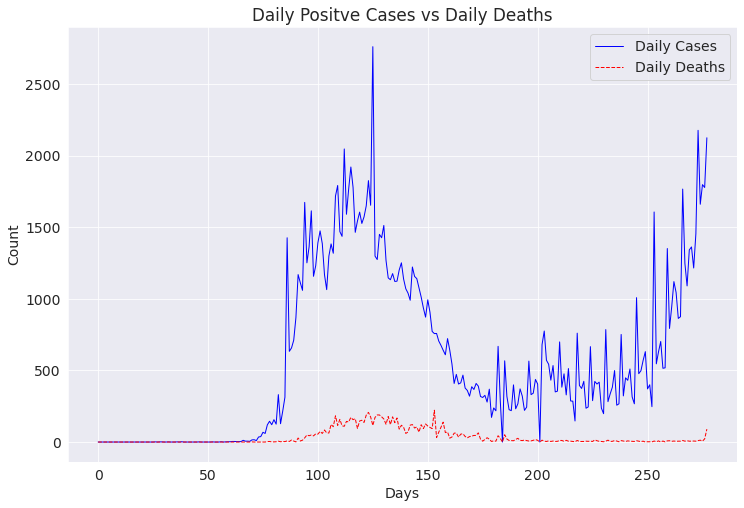

In [29]:
plt.plot(covid_canada_df.new_cases, 'b-', linewidth=1, markersize=5, markeredgewidth=2, markeredgecolor='navy')
plt.plot(covid_canada_df.new_deaths, 'r--', linewidth=1, markersize=5,)
plt.title('Daily Positve Cases vs Daily Deaths')
plt.legend(['Daily Cases', 'Daily Deaths'])
plt.xlabel('Days'); plt.ylabel('Count');

It seems that at the early stages of the locked down (around day 85) the new deaths reported were considerably low, compared to the number of cases. But a few days later a big spike in cases arise.

Also, it seems that today (September 30th) Canada is getting as much new daily cases as the country was reporting during the locked down, but the number of deaths is very close to 0.


##### **Q6: Which days were the ones that reported the highest number of cases?**

To answer this we need to consider the average of daily cases.

In [30]:
covid_canada_df.new_cases.describe()

count     278.000000
mean      585.104317
std       580.803216
min         0.000000
25%         6.000000
50%       399.500000
75%      1055.250000
max      2760.000000
Name: new_cases, dtype: float64

We will consider 1400 cases as threshold, and create a new data frame to analyze the data of these days.

In [31]:
high_positive_cases_df = covid_canada_df[covid_canada_df.new_cases > 1300]
high_positive_cases_df

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,month,day,year
86,2020-03-26,1426.0,8.0,19449.0,3385.0,35.0,161603.0,3,26,2020
94,2020-04-03,1673.0,29.0,26911.0,11268.0,138.0,295065.0,4,3,2020
96,2020-04-05,1363.0,44.0,22878.0,13882.0,231.0,334849.0,4,5,2020
97,2020-04-06,1614.0,49.0,1957.0,15496.0,280.0,336806.0,4,6,2020
100,2020-04-09,1391.0,55.0,14312.0,19274.0,435.0,373581.0,4,9,2020
101,2020-04-10,1474.0,74.0,9741.0,20748.0,509.0,383322.0,4,10,2020
102,2020-04-11,1385.0,60.0,18230.0,22133.0,569.0,401552.0,4,11,2020
106,2020-04-15,1383.0,123.0,11636.0,27046.0,903.0,462353.0,4,15,2020
107,2020-04-16,1318.0,107.0,24707.0,28364.0,1010.0,487060.0,4,16,2020
108,2020-04-17,1717.0,183.0,15943.0,30081.0,1193.0,503003.0,4,17,2020


In [32]:
high_positive_cases_df.shape

(41, 10)

As result, we have that there are 37 days with over 1300 new confirmed cases. Now let us sort these information based on the highest confirmed cases date.

In [33]:
high_positive_cases_df.sort_values('new_cases', ascending=False)

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,month,day,year
125,2020-05-04,2760.0,116.0,25878.0,59474.0,3682.0,919368.0,5,4,2020
273,2020-09-29,2176.0,10.0,102399.0,155301.0,9278.0,7220108.0,9,29,2020
277,2020-10-03,2124.0,90.0,NaN,162659.0,9409.0,NaN,10,3,2020
112,2020-04-21,2046.0,110.0,10380.0,36823.0,1690.0,565931.0,4,21,2020
115,2020-04-24,1920.0,172.0,23297.0,42099.0,2146.0,643398.0,4,24,2020
123,2020-05-02,1825.0,207.0,NaN,55061.0,3391.0,NaN,5,2,2020
275,2020-10-01,1797.0,6.0,60936.0,158758.0,9297.0,7355960.0,10,1,2020
109,2020-04-18,1791.0,116.0,13213.0,31872.0,1309.0,516216.0,4,18,2020
116,2020-04-25,1778.0,156.0,26160.0,43877.0,2302.0,669558.0,4,25,2020
276,2020-10-02,1777.0,22.0,67092.0,160535.0,9319.0,7423052.0,10,2,2020


And now let us plot this information:

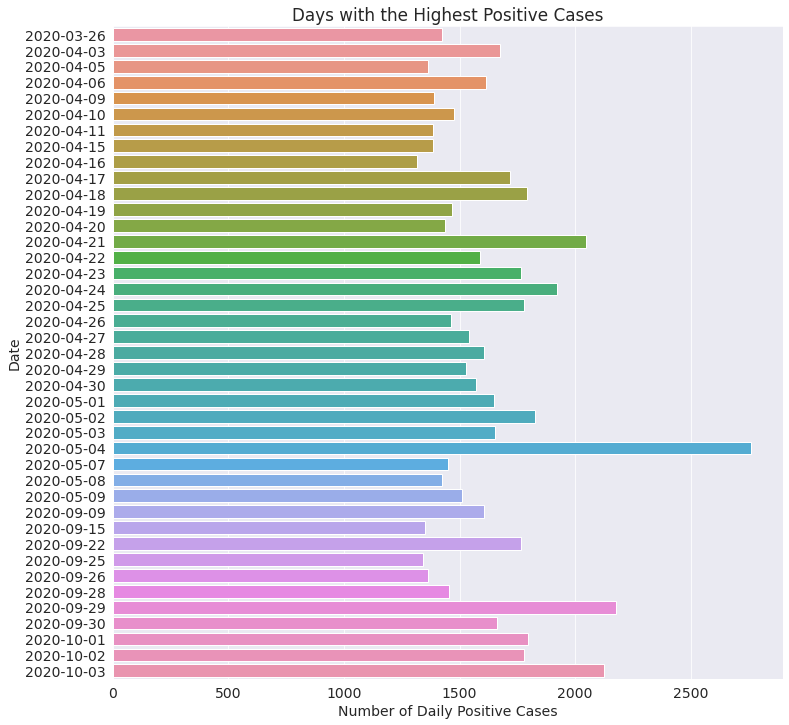

In [34]:
plt.figure(figsize=(12,12))
sns.barplot(high_positive_cases_df.new_cases, high_positive_cases_df.date)
plt.title('Days with the Highest Positive Cases')
plt.xlabel('Number of Daily Positive Cases'); plt.ylabel('Date');

The day with the most reported cases was May 4th, with over 2700 cases.

##### **Q7: Which days were the ones that reported over 150 deaths?**



In [35]:
high_deaths_days_df = covid_canada_df[covid_canada_df.new_deaths > 150]
high_deaths_days_df

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,month,day,year
108,2020-04-17,1717.0,183.0,15943.0,30081.0,1193.0,503003.0,4,17,2020
110,2020-04-19,1469.0,158.0,19846.0,33341.0,1467.0,536062.0,4,19,2020
115,2020-04-24,1920.0,172.0,23297.0,42099.0,2146.0,643398.0,4,24,2020
116,2020-04-25,1778.0,156.0,26160.0,43877.0,2302.0,669558.0,4,25,2020
117,2020-04-26,1464.0,163.0,22105.0,45341.0,2465.0,691663.0,4,26,2020
120,2020-04-29,1526.0,152.0,17553.0,50015.0,2859.0,758412.0,4,29,2020
122,2020-05-01,1649.0,188.0,43939.0,53236.0,3184.0,832222.0,5,1,2020
123,2020-05-02,1825.0,207.0,NaN,55061.0,3391.0,NaN,5,2,2020
124,2020-05-03,1653.0,175.0,NaN,56714.0,3566.0,893490.0,5,3,2020
126,2020-05-05,1298.0,172.0,21199.0,60772.0,3854.0,940567.0,5,5,2020


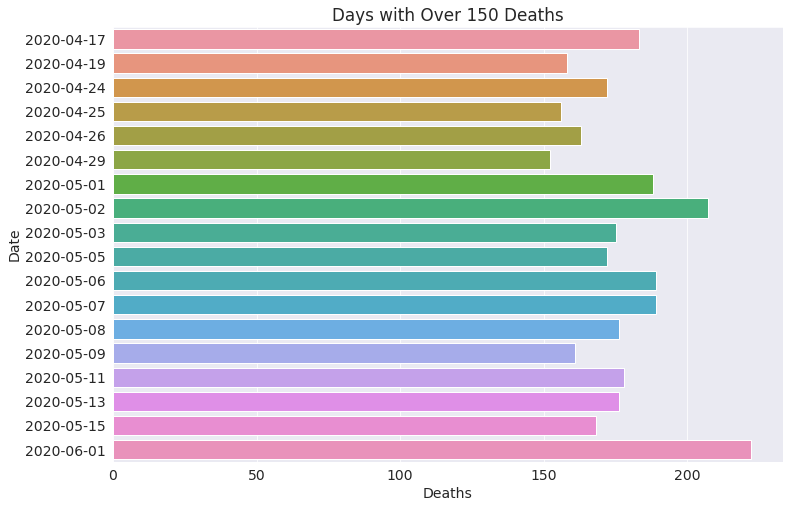

In [36]:
sns.barplot(high_deaths_days_df.new_deaths, high_deaths_days_df.date)
plt.title('Days with Over 150 Deaths')
plt.xlabel('Deaths'); plt.ylabel('Date');

It turned out that June 1st was the day with the highest deaths reported, with 222 deaths.

##### **Q8: How many positive cases did Canada had per month?**

To answer this, it will be necessary to group the information by months instead that per days. To do so, we will use the `.groupby()` method from Pandas.


In [37]:
covid_canada_month_df = covid_canada_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()
covid_canada_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,13.0,0.0,0.0
3,7408.0,89.0,187163.0
4,44163.0,2907.0,531350.0
5,38592.0,4077.0,813491.0
6,13728.0,1493.0,1058567.0
7,11878.0,363.0,1250658.0
8,12155.0,188.0,1353928.0
9,29021.0,174.0,1580305.0


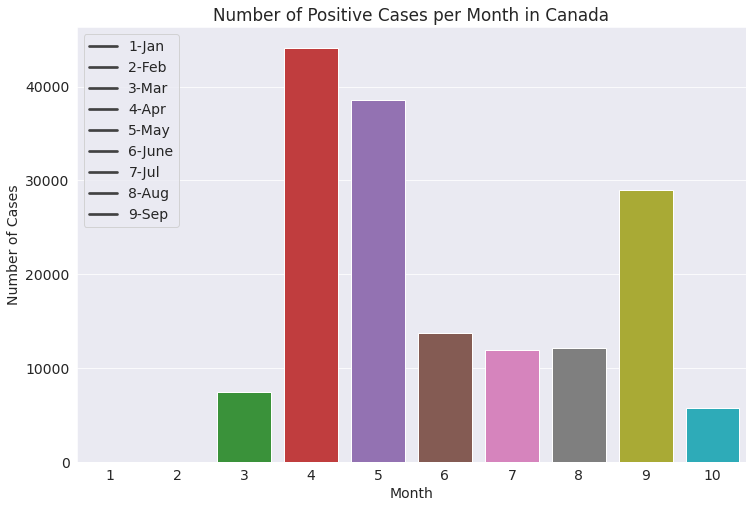

In [38]:
sns.barplot(covid_canada_month_df.index.drop(12), covid_canada_month_df.new_cases.drop(index=12))
plt.title('Number of Positive Cases per Month in Canada')
plt.legend(['1-Jan', '2-Feb', '3-Mar', '4-Apr', '5-May', '6-June', '7-Jul', '8-Aug', '9-Sep'],)
plt.xlabel('Month'); plt.ylabel('Number of Cases');


With this is easy to observe that April was the month with the most positive cases so far, followed by May, and now September.

##### **Q9: Which month is the one with the most number of deaths?**

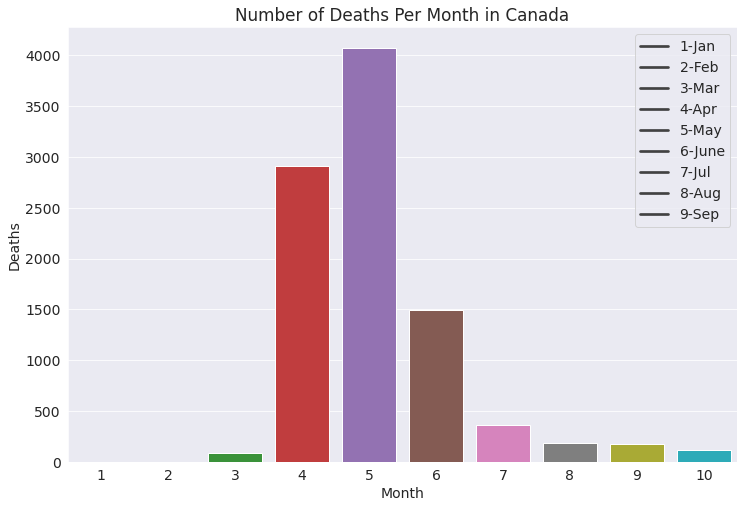

In [39]:
sns.barplot(covid_canada_month_df.index.drop(12), covid_canada_month_df.new_deaths.drop(index=12))
plt.title('Number of Deaths Per Month in Canada')
plt.legend(['1-Jan', '2-Feb', '3-Mar', '4-Apr', '5-May', '6-June', '7-Jul', '8-Aug', '9-Sep'],)
plt.xlabel('Month'); plt.ylabel('Deaths');

May was the month with the most deaths in Canada, followed by April, and after that June. All of them with numbers above or near 1500 deaths.

##### **Q10: How many tests have been performed by month?**

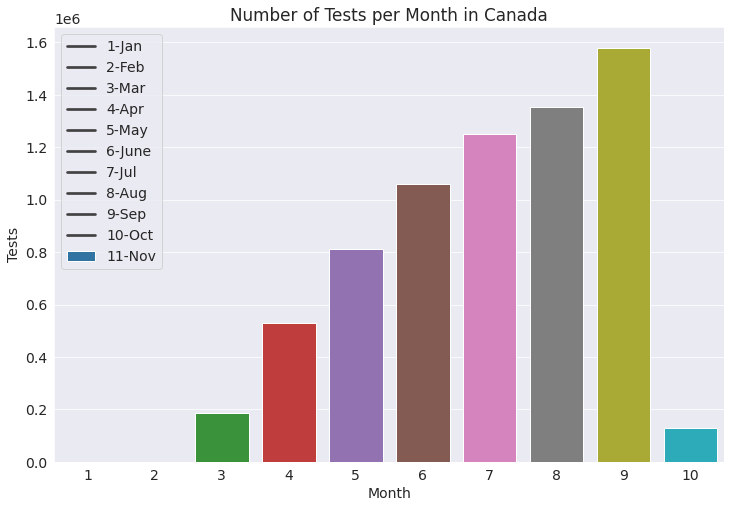

In [40]:
sns.barplot(covid_canada_month_df.index.drop(12), covid_canada_month_df.new_tests.drop(index=12))
plt.title('Number of Tests per Month in Canada')
plt.legend(['1-Jan', '2-Feb', '3-Mar', '4-Apr', '5-May', '6-June', '7-Jul', '8-Aug', '9-Sep', '10-Oct', '11-Nov', '12-Dic'],)
plt.xlabel('Month'); plt.ylabel('Tests');

September is the month with the greatest number of tests performed so far. Also, we can observe that the number of cases were increasing in the matter of thousands since the locked down was implemented, but in the last 3 months that number has not increase as much.

That can lead us to the following question.


##### **Q11: What is the positive case and death rate per month?**

For that we will have to create 2 new columns in the monthly data frame which will be called `death_rate` and `test_positive_rate`.

In [41]:
covid_canada_month_df['death_rate'] = covid_canada_month_df.new_deaths / covid_canada_month_df.new_tests
covid_canada_month_df['test_positive_rate'] = covid_canada_month_df.new_cases / covid_canada_month_df.new_tests
covid_canada_month_df

,new_cases,new_deaths,new_tests,death_rate,test_positive_rate
month,,,,,
1,3.0,0.0,0.0,NaN,inf
2,13.0,0.0,0.0,NaN,inf
3,7408.0,89.0,187163.0,0.000476,0.039580
4,44163.0,2907.0,531350.0,0.005471,0.083115
5,38592.0,4077.0,813491.0,0.005012,0.047440
6,13728.0,1493.0,1058567.0,0.001410,0.012968
7,11878.0,363.0,1250658.0,0.000290,0.009497
8,12155.0,188.0,1353928.0,0.000139,0.008978
9,29021.0,174.0,1580305.0,0.000110,0.018364


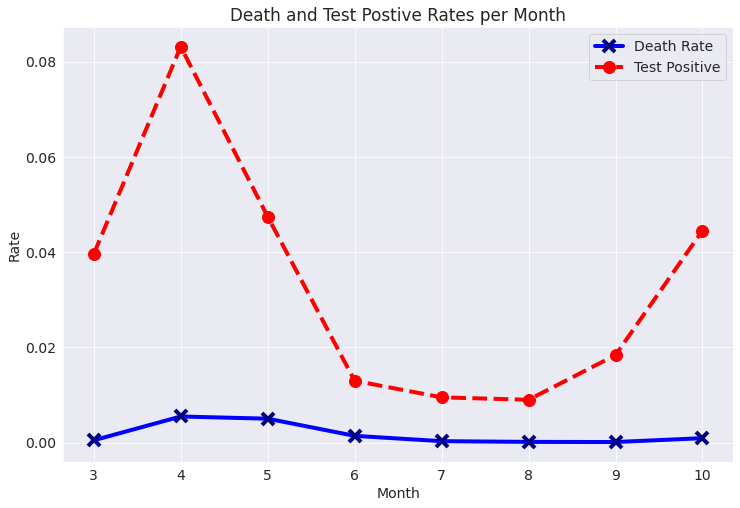

In [42]:
plt.plot(covid_canada_month_df.index, covid_canada_month_df.death_rate, 'b-x', linewidth=4, markersize=12, markeredgewidth=4, markeredgecolor='navy')
plt.plot(covid_canada_month_df.index, covid_canada_month_df.test_positive_rate, 'r--o', linewidth=4, markersize=12,)
plt.title('Death and Test Postive Rates per Month')
plt.legend(['Death Rate', 'Test Positive'])
plt.xlabel('Month'); plt.ylabel('Rate');

##### **Q12: What is tha porcentage of the population that have tested positive in the country?**

To answer this question let us include the population of the country in the `covid_canada_df` data frame. Also, we will create a pie chart to see the whole picture.

In [43]:
covid_canada_df['population'] = canada_df.population
covid_canada_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,month,day,year,population
0,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,12,31,2019,37742157.0
1,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,1,1,2020,37742157.0
2,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,1,2,2020,37742157.0
3,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,1,3,2020,37742157.0
4,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,1,4,2020,37742157.0
...,...,...,...,...,...,...,...,...,...,...,...
273,2020-09-29,2176.0,10.0,102399.0,155301.0,9278.0,7220108.0,9,29,2020,37742157.0
274,2020-09-30,1660.0,13.0,74916.0,156961.0,9291.0,7295024.0,9,30,2020,37742157.0
275,2020-10-01,1797.0,6.0,60936.0,158758.0,9297.0,7355960.0,10,1,2020,37742157.0
276,2020-10-02,1777.0,22.0,67092.0,160535.0,9319.0,7423052.0,10,2,2020,37742157.0


Now, we extract the following information:

In [44]:
population = covid_canada_df.population[0]
total_cases = covid_canada_df.total_cases[covid_canada_df.total_cases.last_valid_index()]
total_deaths = covid_canada_df.total_deaths[covid_canada_df.total_deaths.last_valid_index()]
total_tests = covid_canada_df.total_tests[covid_canada_df.total_tests.last_valid_index()]
total_non_tested = population - total_tests

And finally, it is just a matter to plot the inforamtion as follows:

Text(0.5, 1.0, 'Population in Canada per Tests, Cases, Deaths')

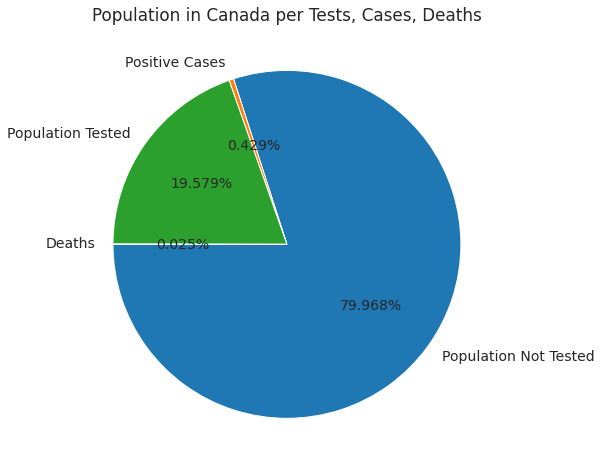

In [45]:
plt.pie([total_non_tested, total_cases,  total_tests, total_deaths], 
        labels=['Population Not Tested', 'Positive Cases', 'Population Tested', 'Deaths'], 
        autopct='%1.3f%%', startangle=180, counterclock=True, data=True, )
plt.title('Population in Canada per Tests, Cases, Deaths')

It turns out that, not even 20% of the population of Canada has been tested for COVID-19 where:

* ~19.5% of the population has been tested
* ~0.5% of the population has been tested positive
* ~0.02% of the population has die
* ~80% of the population has not been tested yet


#### **Saving the Dataframes as CSV Files**

Finally, we can save the data frames as CSV files for further reference, as follows:

In [46]:
covid_canada_df.to_csv('canada_covid_slim_data.csv', index=False)
covid_canada_month_df.to_csv('canada_covid_monthly_data.csv', index=False)

#### **Inferences and Conlusions**

In this notebook an analysis about how the COVID-19 pandemic has impacted Canada was presented, where the findings about the data are listed as follows:

1. Canada implemented a total lock down on March 16th, 2020 with 304 only 304 confirmed cases and 1 registered death.
2. The first reported death related to COVID-19 was registered a few days before the Canadian government implemented the lock down.
3. April (44163), May (38592), and September (29021) have been the months with the most cases reported





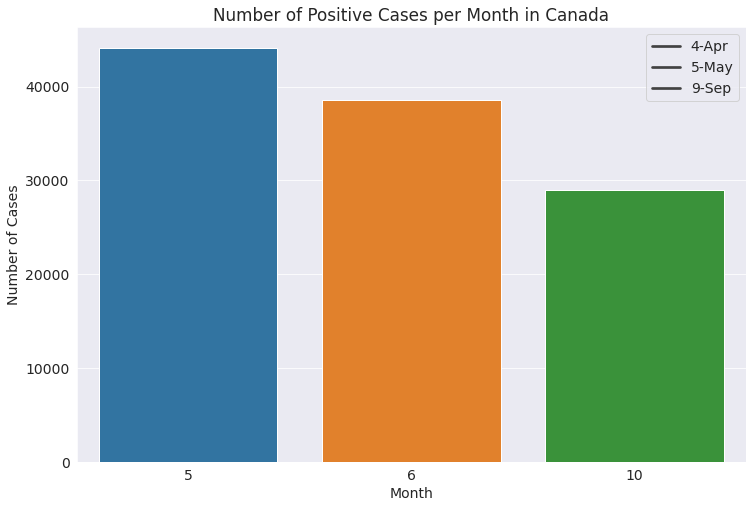

In [47]:
sns.barplot([covid_canada_month_df.index[4], covid_canada_month_df.index[5], covid_canada_month_df.index[9]], 
            [covid_canada_month_df.new_cases[4], covid_canada_month_df.new_cases[5], covid_canada_month_df.new_cases[9]])
plt.title('Number of Positive Cases per Month in Canada')
plt.legend(['4-Apr', '5-May', '9-Sep'])
plt.xlabel('Month') 
plt.ylabel('Number of Cases');

4. May was the month with the highest number of deaths related to COVID-19, with 4077
5. Due to the relaxation on the preventive measures implemented during the lock down, the number of daily cases reported in the country have been increasing at a fast pace, and even matching the numbers reported at the beginning of the pandemic


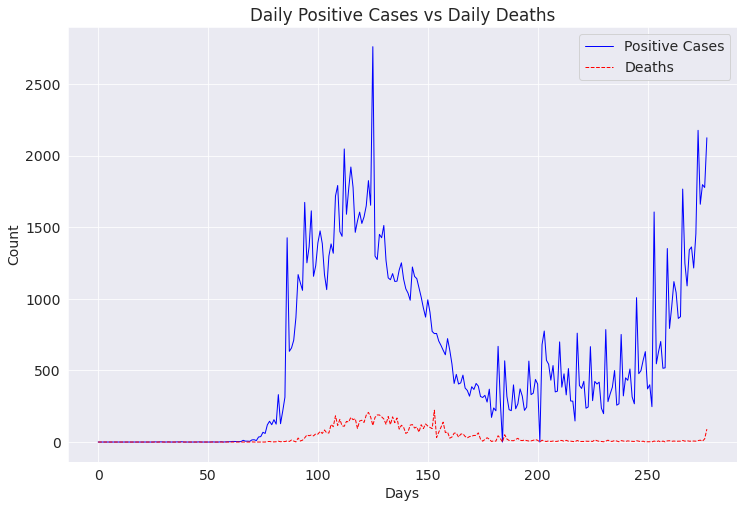

In [59]:
plt.plot(covid_canada_df.new_cases, 'b-', linewidth=1, markersize=5, markeredgewidth=2, markeredgecolor='navy')
plt.plot(covid_canada_df.new_deaths, 'r--', linewidth=1, markersize=5,)
plt.title('Daily Positive Cases vs Daily Deaths')
plt.legend(['Positive Cases', 'Deaths'])
plt.xlabel('Days'); plt.ylabel('Count');

6. In other hand the number of deaths have been stabilized. 
7. In September, the number of daily cases was very high, but the number of deaths was kept low.

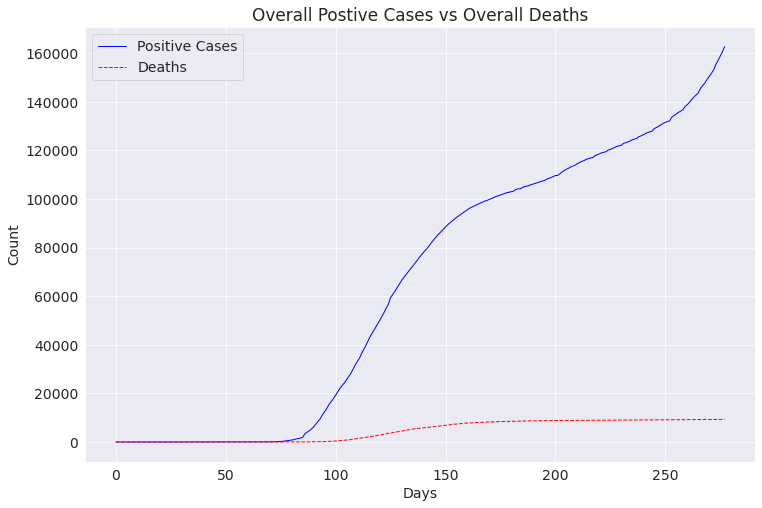

In [49]:
plt.plot(covid_canada_df.total_cases, 'b-', linewidth=1, markersize=5, markeredgewidth=2, markeredgecolor='navy')
plt.plot(covid_canada_df.total_deaths, 'r--', linewidth=1, markersize=5,)
plt.title('Overall Postive Cases vs Overall Deaths')
plt.legend(['Positive Cases', 'Deaths'])
plt.xlabel('Days'); plt.ylabel('Count');

The reason why the number of cases is incrementing in the country could be due to the relaxation on the preventive measures of infection, e.g. reopening of restaurants, bigger gathering groups, reopening of schools. 

The biggest difference between now and these days (September) and the beginning of the lock down (March and April) is that the use of masks is generalized, which can lead to the assumption that somehow the use of masks is helping to keep the number of deaths low.

Still it is very early to make this assumption as valid, but it could be a possibility. 

Finally, based on the rise of the numbers of daily positive cases it is understandable that the government made the announcement that the country was approaching a second wave of the COVID-19 pandemic. 

As of today (October 1st, 2020), the provincial governments have already started to act:

* Quebec has already up to 800 daily cases, and they will start to bill people for gathering
* Ontario has not implemented any restrictions yet, but is likely to follow Quebec
* You can find more information [here](https://www.youtube.com/watch?v=dPNPEDTSnjE)

This is the reason why this year Canada will miss Thanksgiving, and even PM Justin Trudeau said:

> "We still have a shot for Christmas"

But the reality is that it does not like we will make it for Christmas either.


#### References and Future Work

There is a wealth of information to be discovered using the COVID-19 dataset, and we have barely scratched the surface. Here are some ideas for further exploration:

- Repeat the analysis for different country and compare the results with the ones from Canada
- Prepare an analysis based on world region or neighbor countries, e.g. Canada, USA, Mexico
- Compare how the data from different countries reflects how the local governments have responded to the pandemic


References:



- Our World in Data - COVID-19 Dataset: https://ourworldindata.org/coronavirus 
- Government of Canada - Coronavirus disease (COVID-19): Outbreak update: https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

#### **Commit to Jovian.ml**

Whether you are running this Jupyter notebook on an online service like Binder or on your local machine, it's important to save your work from time, so that you can access it later, or share it online. You can upload this notebook to your [Jovian.ml](https://jovian.ml) account using the `jovian` Python library.

In [50]:
# Install the library 
!pip install jovian --upgrade --quiet
import jovian

<IPython.core.display.Javascript object>

In [ ]:
jovian.commit(project='canada-covid19-analysis', outputs=['./canada_covid_slim_data.csv',
                                                          './canada_covid_monthly_data.csv',
                                                          './canada_covid_data.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/fabianac07/canada-covid19-analysis


<IPython.core.display.Javascript object>